In [16]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

In [17]:
# Load and preprocess the data
max_features = 400
maxlen = 300

In [18]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [19]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(max_features, 128))  # Increased embedding dimension
model.add(SpatialDropout1D(0.2))  # Dropout in embedding layer to reduce overfitting
model.add(LSTM(64, return_sequences=True))  # Increased LSTM units and return sequences
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(LSTM(64))  # Additional LSTM layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

model.summary()

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Lowered learning rate for more stable training
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=False)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Fit the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20


2024-08-26 18:29:06.557340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 85ms/step - accuracy: 0.6317 - loss: 0.6293 - val_accuracy: 0.7634 - val_loss: 0.5093
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - accuracy: 0.6886 - loss: 0.5872 - val_accuracy: 0.7172 - val_loss: 0.5629
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - accuracy: 0.7597 - loss: 0.4972 - val_accuracy: 0.8126 - val_loss: 0.4154
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.8142 - loss: 0.4224 - val_accuracy: 0.8173 - val_loss: 0.4081
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.8235 - loss: 0.3934 - val_accuracy: 0.8281 - val_loss: 0.3938
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - accuracy: 0.8314 - loss: 0.3862 - val_accuracy: 0.8332 - val_loss: 0.3758
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.8387 - loss: 0.3692 - val_accuracy: 0.8271 - val_loss: 0.4013
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.8422 - loss: 0.3568 - val_accurac

In [21]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}') 

782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8433 - loss: 0.3651
Loss: 0.3621238172054291, Accuracy: 0.8469600081443787


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step


<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

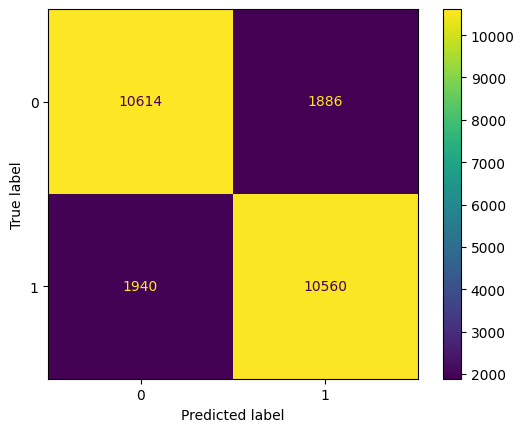

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, (predictions > 0.5).astype(int))
ConfusionMatrixDisplay(cm).plot()
confusion_matrix